In [38]:
import pandas as pd 

In [39]:
inventory_data=pd.read_csv("C:/Users/user/Downloads/Inventory_Dataset.csv")

In [40]:
new_inventory_data=pd.read_csv("C:/Users/user/Downloads/New_Inventory.csv")

In [41]:
inventory_data.dtypes

Item Number    object
Date           object
Inventory       int64
dtype: object

In [42]:
new_inventory_data.dtypes

Item Number          object
Inventory Receive    object
Total Item Qty        int64
dtype: object

In [33]:
new_inventory_data

,Item Number,Date,Inventory,Inventory Receive,Total Item Qty
0,064-01-1347,17-06-2023,3561,10-07-2023,2000
1,064-01-1347,17-06-2023,3561,07-07-2023,1000
2,064-01-1347,17-06-2023,3561,09-07-2023,3568
3,064-01-1347,17-06-2023,3561,04-08-2023,1800
4,064-01-1361,17-06-2023,4035,10-07-2023,2000
...,...,...,...,...,...
931,064-18-3316,17-06-2023,7354,13-10-2023,1380
932,064-18-3316,17-06-2023,7354,29-09-2023,1380
933,064-18-3316,17-06-2023,7354,08-09-2023,500
934,064-18-9667,17-06-2023,7029,13-10-2023,992


In [43]:
new_inventory_data=new_inventory_data.rename(columns={'Inventory Receive':'Date','Total Item Qty':'Inventory'})
total_inventory_data=inventory_data.append(new_inventory_data)

C:\Users\user\AppData\Local\Temp\ipykernel_18400\2511920104.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_inventory_data=inventory_data.append(new_inventory_data)


In [44]:
total_inventory_data.shape

(1395, 3)

In [45]:
total_inventory_data

,Item Number,Date,Inventory
0,064-01-1347,17-06-2023,3561
1,064-01-1361,17-06-2023,4035
2,064-01-1375,17-06-2023,2684
3,064-01-1385,17-06-2023,5136
4,064-01-1399,17-06-2023,6399
...,...,...,...
1034,064-09-3787,07-07-2023,2088
1035,064-09-5287,07-07-2023,1388
1036,064-09-7924,07-07-2023,1632
1037,064-09-9076,07-07-2023,1708


In [57]:
total_inventory_data['Date'] = pd.to_datetime(total_inventory_data['Date'], errors='coerce')
total_inventory_data=total_inventory_data.sort_values(['Date'],ignore_index=True)
total_inventory_data_grp=(total_inventory_data.groupby(['Item Number', pd.Grouper(freq='W', key='Date')])
             ['Inventory']
             .sum()
             .unstack(fill_value=0))

In [58]:

total_inventory_data_grp

Date,2023-10-01,2023-10-15,2023-06-18,2023-04-09,2023-07-09,2023-08-20,2023-09-10,2023-10-08,2023-08-13,2023-07-30,2023-07-16,2023-09-24,2023-10-22,2023-01-15,2023-12-17,2023-07-23,2023-11-26,2023-08-27,2023-09-17
Item Number,,,,,,,,,,,,,,,,,,,
064-01-0003,5488,1864,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
064-01-0005,7380,2520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
064-01-0006,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
064-01-0012,6840,3244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
064-01-0013,6300,1748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9884,0,0,12419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
064-18-9904,0,0,0,0,0,0,0,0,0,0,0,0,0,18700,5100,0,0,0,0
064-18-9909,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
import matplotlib.pyplot as plt
from calendar import month_name
total_inventory_data['Month']=pd.Categorical(total_inventory_data['Date'].dt.month_name(), month_name[1:])
total_inventory_data=total_inventory_data.sort_values(['Month'],ignore_index=True)
total_inventory_data

,Item Number,Date,Inventory,Month
0,064-18-9904,2023-01-12,18700,January
1,064-18-0170,2023-01-12,18360,January
2,064-11-4530,2023-04-08,1036,April
3,064-13-0359,2023-04-08,776,April
4,064-09-1062,2023-04-08,740,April
...,...,...,...,...
1390,064-18-0214,2023-10-22,3380,October
1391,064-18-0309,2023-11-26,12424,November
1392,064-18-4752,2023-11-26,12424,November
1393,064-18-0170,2023-12-15,4860,December


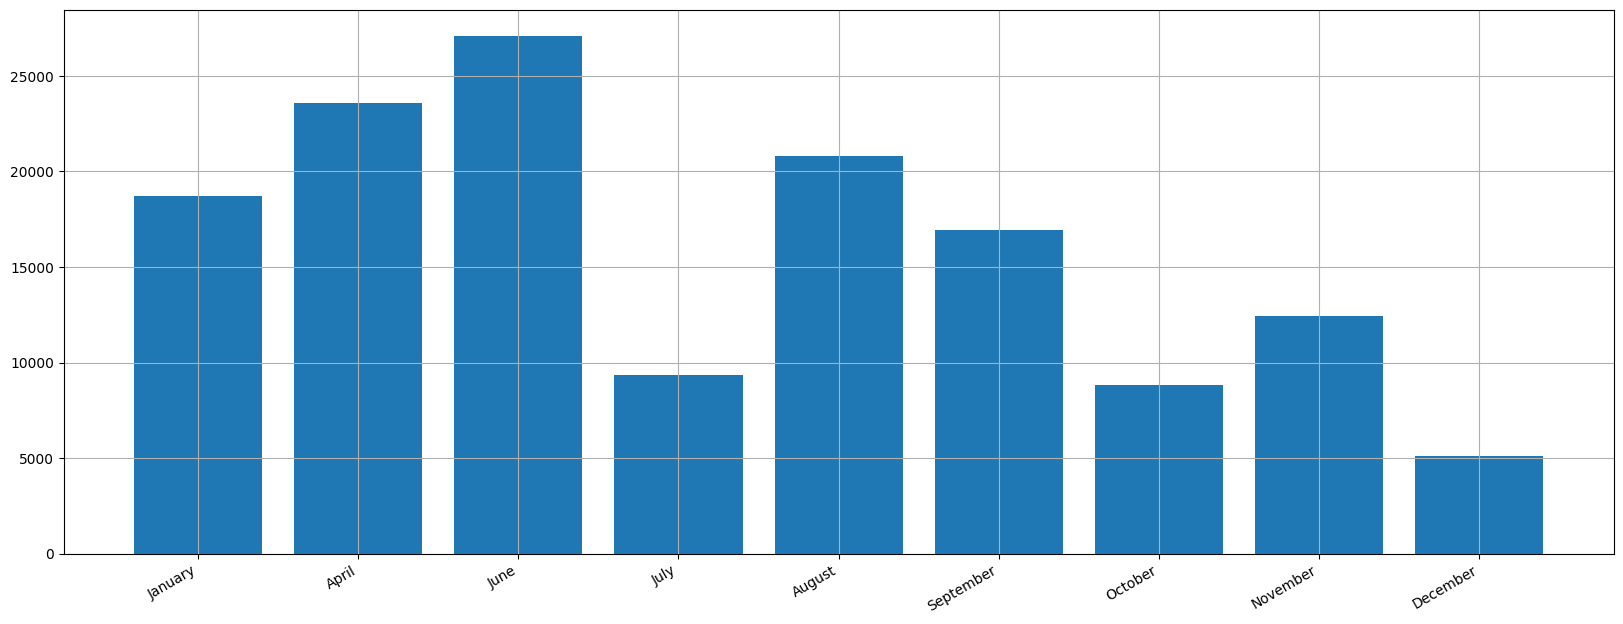

In [60]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
fig.autofmt_xdate()
plt.bar(total_inventory_data['Month'],total_inventory_data['Inventory'])
plt.show()